<a href="https://colab.research.google.com/github/mlambe10/Water-Quality-Analysis/blob/main/Water_Quality_Bayesian_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data = pd.read_csv('waterQuality1.csv')

# Convert 'ammonia' and 'is_safe' to numeric
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')
data['is_safe'] = pd.to_numeric(data['is_safe'], errors='coerce')

# Drop rows with missing values that may have been introduced by coercion
data_cleaned = data.dropna()

# Function to replace outliers with mean
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[column].mean()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    return df

# Replace outliers with mean for 'aluminium' and 'arsenic'
data_cleaned = replace_outliers_with_mean(data_cleaned, 'aluminium')
data_cleaned = replace_outliers_with_mean(data_cleaned, 'arsenic')

# Remove outliers for 'nitrites'
Q1 = data_cleaned['nitrites'].quantile(0.25)
Q3 = data_cleaned['nitrites'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cleaned = data_cleaned[(data_cleaned['nitrites'] >= lower_bound) & (data_cleaned['nitrites'] <= upper_bound)]

# Define features and target variable
X = data_cleaned.drop(columns=['is_safe'])
Y = data_cleaned['is_safe']

# Split the dataset into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

# Predict probabilities for further analysis
Y_prob = model.predict_proba(X_test)
print(f"Predicted Probabilities:\n{Y_prob[:5]}")


Model Accuracy: 0.8630393996247655
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92      1423
         1.0       0.42      0.68      0.52       176

    accuracy                           0.86      1599
   macro avg       0.69      0.78      0.72      1599
weighted avg       0.90      0.86      0.88      1599

Predicted Probabilities:
[[9.97949680e-01 2.05031968e-03]
 [9.99962490e-01 3.75098809e-05]
 [9.99450717e-01 5.49282656e-04]
 [9.93447783e-01 6.55221701e-03]
 [8.03182866e-01 1.96817134e-01]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load and clean the data
data = pd.read_csv('waterQuality1.csv')
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')
data['is_safe'] = pd.to_numeric(data['is_safe'], errors='coerce')
data_cleaned = data.dropna()

# Replace outliers with mean
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[column].mean()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    return df

data_cleaned = replace_outliers_with_mean(data_cleaned, 'aluminium')
data_cleaned = replace_outliers_with_mean(data_cleaned, 'arsenic')

# Remove outliers for 'nitrites'
Q1 = data_cleaned['nitrites'].quantile(0.25)
Q3 = data_cleaned['nitrites'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cleaned = data_cleaned[(data_cleaned['nitrites'] >= lower_bound) & (data_cleaned['nitrites'] <= upper_bound)]

# Select key variables
key_variables = ['cadmium', 'arsenic', 'viruses', 'uranium', 'nitrates', 'aluminium', 'chloramine', 'is_safe']
data_key_vars = data_cleaned[key_variables]

# Split the data into training and testing sets
X = data_key_vars.drop('is_safe', axis=1)
y = data_key_vars['is_safe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")



Model Accuracy: 0.9136960600375235
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1396
         1.0       0.67      0.64      0.65       203

    accuracy                           0.91      1599
   macro avg       0.81      0.79      0.80      1599
weighted avg       0.91      0.91      0.91      1599



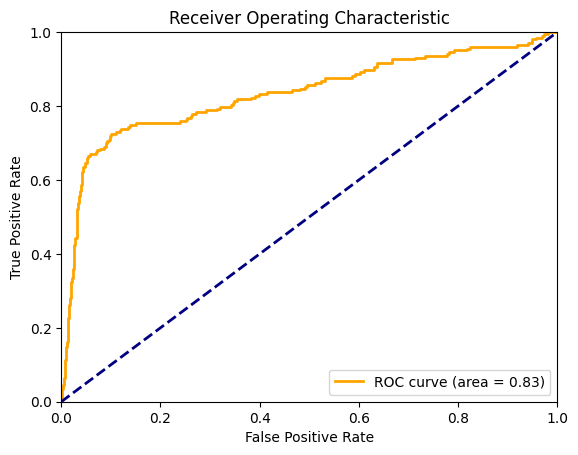

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load and clean the data
data = pd.read_csv('waterQuality1.csv')
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce')
data['is_safe'] = pd.to_numeric(data['is_safe'], errors='coerce')
data_cleaned = data.dropna()

# Replace outliers with mean
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = df[column].mean()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    return df

data_cleaned = replace_outliers_with_mean(data_cleaned, 'aluminium')
data_cleaned = replace_outliers_with_mean(data_cleaned, 'arsenic')

# Remove outliers for 'nitrites'
Q1 = data_cleaned['nitrites'].quantile(0.25)
Q3 = data_cleaned['nitrites'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_cleaned = data_cleaned[(data_cleaned['nitrites'] >= lower_bound) & (data_cleaned['nitrites'] <= upper_bound)]

# Select key variables
key_variables = ['cadmium', 'arsenic', 'viruses', 'uranium', 'nitrates', 'aluminium', 'chloramine', 'is_safe']
data_key_vars = data_cleaned[key_variables]

# Split the data into training and testing sets
X = data_key_vars.drop('is_safe', axis=1)
y = data_key_vars['is_safe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Predict probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()